# AI ASSIGNMENT 1
# Bayesian Network Modeling 

## 18K-0199
## 18K-1263

In [1]:
import csv
from copy import deepcopy
import networkx as nx
import matplotlib.pyplot as plt




class Graph:
    
    def __init__(self):
         self.adj = {}
        
    def addEdge(self,v1,v2,state):
        
        try:
            self.adj[v1][v2].append(state)
            
        except:

            try:
                self.adj[v1][v2] = [state]

            except:

                self.adj[v1] = {v2:[state]}
            
            




### Function to remove cycles

In [2]:



def traverse(adj,x,left,vis = []):
    
    if x not in vis:
        vis.append(x)
    
    for y in adj[x].keys():
        
        
        if y in left_vertices and adj[x][y]!=[]:
            
            left_vertices.remove(y)
            traverse(adj,y,left,vis)
            
        elif y in vis:
            
            gene_network.adj[x][y] = []
        
        
    vis.remove(x)
            
                
def remove_cycle(adj):
    left_vertices = list(adj.keys())
    while(len(left_vertices)!=0):
        x = left_vertices.pop(0)
        traverse(gene_network.adj,x)
    
    
    



### Probabilistic formulation to show that how probabilities of cause and effect can be measure between interaction of two vertices for Q1

In [48]:
def  gene_interaction(src,trgt,state,prob_src):
    
    
    states = [0,0,0]
    
    
    for val in set(gene_network.adj[src][trgt]):
        if val == 'Activation':
            states[0] = 1
        elif val == 'Repression':
            states[1] = 1
        elif val == 'Unknown':
            states[2] = 1
            
    if state == 'Activation':
        key = 0

    elif state == 'Repression':
        key = 1
            
    prob = ( states[key] + ( states[2]/2 ) ) / sum(states)
    
    return prob*prob_src





### Finds the path from source to target for  cascading effect in Q2

In [13]:


def cascade(adj,x,target,path = []):

    global found,traget_state,temp_path
    
    if found:
        return
    
    path.append(x)
    
    
    for y in adj[x].keys():
        
        if y in left_vertices and ( traget_state in adj[x][y] or 'Unknown' in adj[x][y] ):
            if target == y:
                found = True
                temp_path = deepcopy(path)
                return
            
            left_vertices.remove(y)
            traverse(adj,y,target,path)
            
        
        
    path.remove(x)

    



Extracting the BetweenCLose centrality score

In [58]:
centrality = dict()
with open ('GRN_source_target_network_analyze.csv') as csvfile:
    col = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for row in col:
        val = row[0].split(',')[1:3]
        centrality[val[0]] = val[1]

Creating the graph from data

In [14]:


geneData = []
with open ('GRN_source_Target_TFS.csv') as csvfile:
    col = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for row in col:
        geneData.append(row[0].split(',')[1:4])
        
    geneData = geneData[1:]



gene_network = Graph()

for gene in geneData:
    gene_network.addEdge(gene[0],gene[1],gene[2])
    
    


## Query 1

In [64]:
# souurce probablity of AR pre-calculated using bayseian theorem
source_probabilty = 0.268

gene_interaction('AR','ERBB2','Activation',source_probabilty)

0.1305


## Query 2

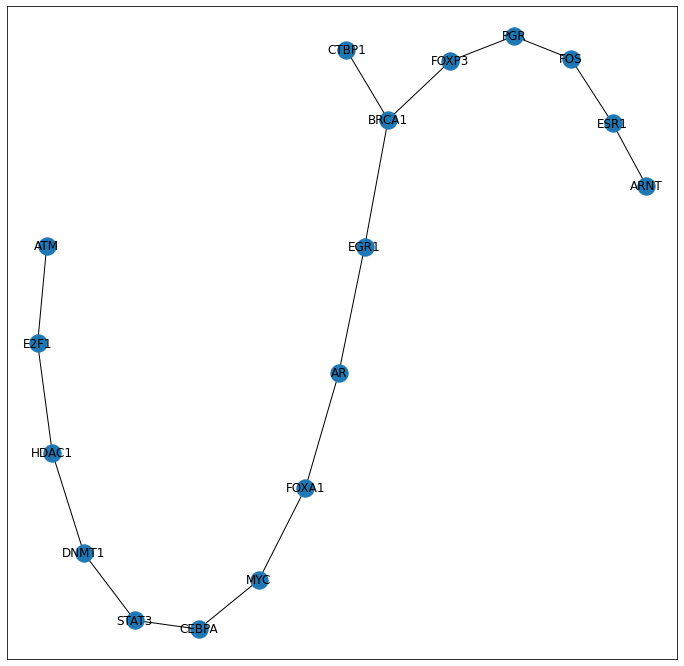

In [43]:


gene1 = 'CTBP1'
gene2 = 'ARNT'
traget_state = 'Repression'
target = 'ATM'


temp_path = []



# getting sub graph from src - target path CTBP1
left_vertices = list(gene_network.adj.keys())
found = False
cascade(gene_network.adj,gene1,target,[])
path1 = temp_path
    
    
# getting sub graph from src - target path ARNT   
left_vertices = list(gene_network.adj.keys())
found = False
cascade(gene_network.adj,gene2,target,[])
path2 = temp_path    



# find point of intersection between both graphs
inter = ''
for val in path1:
    if val in path2:
        inter = val
        break
        


        

plt.figure(figsize=(12,12))

G = nx.Graph()


edges = []

#creating a union from both graph
    

for i in range(len(path1)):
    if path1[i] == inter:
        break
    else:
        edges+=[(path1[i],path1[i+1])]


for i in range(len(path2)-1):
    edges+=[(path2[i],path2[i+1])]
    
edges+=[(path1[-1],target)]
    
G.add_edges_from(edges)
nx.draw_networkx(G)
plt.show()

In [65]:
#prbablity of ARNT being on
prob1 = 0.5
#probablity of CTBP1being on
prob2 = 0.285
#souurce probablities  pre-calculated using bayseian theorem

key = 0


for i in range(len(path1)):
    
    if path1[i] == inter:
        key = i
        break
    else:
        prob1  = gene_interaction(path1[i],path1[i+1],traget_state,prob1)
        


for i in range(len(path2)):
    if path1[i] == inter:
        break
    else:
        prob2  = gene_interaction(path2[i],path2[i+1],traget_state,prob2)

#computing probabilty upto the target
prob = prob1 + prob2


for i in range(len(path1[key:])-1):
    prob  = gene_interaction(path1[key+i],path1[key+i+1],traget_state,prob)
    

print(prob)

0.116
